Dataset Description:
Index	Variable	Description
1.	hotel  -------                 	Type of hotel (Resort Hotel, City Hotel)
2.	is_canceled -------                 	Reservation cancellation status (0 = not canceled, 1 = canceled)
3.	lead_time -------                 	Number of days between booking and arrival
4.	arrival_date_year -------                 	Year of arrival
5.	arrival_date_month -------                 	Month of arrival
6.	arrival_date_week_number -------                 	Week number of the year for arrival
7.	arrival_date_day_of_month -------                 	Day of the month of arrival
8.	stays_in_weekend_nights -------                 	Number of weekend nights (Saturday and Sunday) the guest stayed or booked
9.	stays_in_week_nights -------                 	Number of week nights the guest stayed or booked
10.	adults -------                 	Number of adults
11.	children -------                 	Number of children
12.	babies -------                 	Number of babies
13.	meal -------                 	Type of meal booked (BB, FB, HB, SC, Undefined)
14.	country -------                 	Country of origin of the guest
15.	market_segment -------                 	Market segment designation
16.	distribution_channel -------                 	Booking distribution channel
17.	is_repeated_guest -------                 	If the guest is a repeat customer (0 = not repeated, 1 = repeated)
18.	previous_cancellations -------                 	Number of previous bookings that were canceled by the customer
19.	previous_bookings_not_canceled -------                 	Number of previous bookings that were not canceled by the customer
20.	reserved_room_type -------                 	Type of reserved room
21.	assigned_room_type -------                 	Type of assigned room
22.	booking_changes -------                 	Number of changes made to the booking
23.	deposit_type -------                 	Type of deposit made (No Deposit, Refundable, Non Refund)
24.	agent -------                 	ID of the travel agent responsible for the booking
25.	company -------                 	ID of the company responsible for the booking
26.	days_in_waiting_list -------                 	Number of days the booking was in the waiting list
27.	customer_type -------                 	Type of customer (Transient, Contract, Transient-Party, Group)
28.	adr -------                 	Average Daily Rate
29.	required_car_parking_spaces -------                 	Number of car parking spaces required
30.	total_of_special_requests -------                 	Number of special requests made
31.	reservation_status -------                 	Last reservation status (Check-Out, Canceled, No-Show)
32.	reservation_status_date -------                 	Date of the last reservation status
33.	name -------                 	Guest's name
34.	email -------                 	Guest's email address
35.	phone-number -------                 	Guest's phone number
36.	credit_card -------                 	Last four digits of the guest's credit card

#### Importing important libraries

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler

from sklearn import metrics

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# import the XGBoost function for classification
!pip install xgboost
from xgboost import XGBClassifier

Defaulting to user installation because normal site-packages is not writeable


#### Reading the File

In [2]:
data = pd.read_csv(r"C:\Susovan Das\One Drive\OneDrive\Desktop\Desktop files\hotel_booking.csv")

In [3]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.000000,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.000000,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.000000,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.000000,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.000000,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.000000,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.000000,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.000000,NaN,0,Transient,75.000000,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.000000,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.000000,NaN,0,Transient,98.000000,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [4]:
data.duplicated().sum()

0

In [5]:
data.shape

(119390, 36)

In [6]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [7]:
data.country.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

#### Dropping unwanted columns

In [8]:
data.drop(["credit_card", "email", "name", "phone-number"], axis=1, inplace=True)

In [9]:
data.shape

(119390, 32)

In [10]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.000000,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.000000,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.000000,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.000000,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.000000,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.000000,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.000000,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.000000,NaN,0,Transient,75.000000,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.000000,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.000000,NaN,0,Transient,98.000000,0,1,Check-Out,2015-07-03


In [11]:
data.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [12]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [14]:
# Dropping 'agent' and 'country' column because it has lots of unique values and it is Categorical
data.drop(["country","agent"], inplace=True, axis=1)

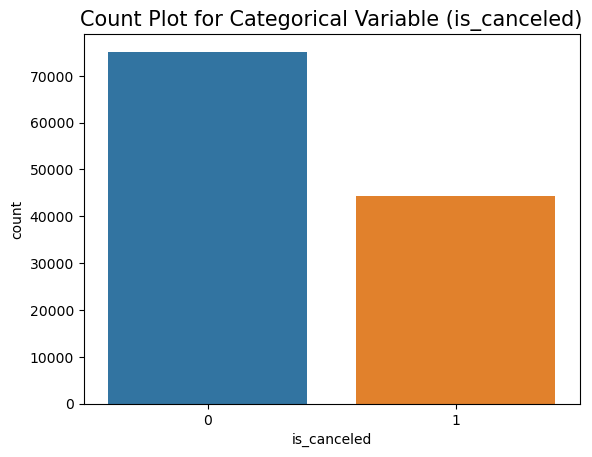

In [15]:
sns.countplot(x=data.is_canceled)
plt.title('Count Plot for Categorical Variable (is_canceled)', fontsize = 15)
plt.show()

#### Checking for Null values in our Dataset

In [16]:
Total = data.isnull().sum().sort_values(ascending=False)          
Percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
company,112593,94.306893
children,4,0.003350
hotel,0,0.000000
previous_cancellations,0,0.000000
reservation_status,0,0.000000
total_of_special_requests,0,0.000000
required_car_parking_spaces,0,0.000000
adr,0,0.000000
customer_type,0,0.000000
days_in_waiting_list,0,0.000000


In [17]:
# Dropping Company column because it contains 94% missing data
data.drop(["company"], axis=1, inplace=True)

In [18]:
data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.000000,0,BB,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.000000,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.000000,0,BB,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.000000,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.000000,0,BB,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.000000,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.000000,0,BB,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.000000,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.000000,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.000000,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.000000,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.000000,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.000000,0,BB,Direct,Direct,0,0,0,C,C,0,No Deposit,0,Transient,107.000000,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.000000,0,FB,Direct,Direct,0,0,0,C,C,0,No Deposit,0,Transient,103.000000,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.000000,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,82.000000,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.000000,0,HB,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,105.500000,0,0,Canceled,2015-04-22


In [19]:
data.shape

(119390, 29)

In [20]:
# Deleting null rows in 'children' column
delete = data[pd.isna(data['children'])]

In [21]:
delete

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,NaN,0,BB,Undefined,Undefined,0,0,0,B,B,0,No Deposit,0,Transient-Party,12.000000,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,NaN,0,BB,Direct,Undefined,0,0,0,B,B,0,No Deposit,0,Transient-Party,12.000000,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,NaN,0,BB,Undefined,Undefined,0,0,0,B,B,0,No Deposit,0,Transient-Party,18.000000,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,NaN,0,BB,Online TA,Undefined,0,0,0,B,B,0,No Deposit,0,Transient-Party,76.500000,0,1,Canceled,2015-08-09


In [22]:
data.drop(delete.index, inplace=True)

In [23]:
data.shape

(119386, 29)

In [24]:
Total = data.isnull().sum().sort_values(ascending=False)          
Percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
hotel,0,0.000000
is_repeated_guest,0,0.000000
reservation_status,0,0.000000
total_of_special_requests,0,0.000000
required_car_parking_spaces,0,0.000000
adr,0,0.000000
customer_type,0,0.000000
days_in_waiting_list,0,0.000000
deposit_type,0,0.000000
booking_changes,0,0.000000


In [25]:
y = data['is_canceled']

In [26]:
y.shape

(119386,)

In [27]:
# filter the numerical features in the dataset
data_num = data.select_dtypes(include = [np.number])
data_num.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [28]:
data_num.shape

(119386, 18)

In [29]:
data_cat = data.select_dtypes(include=[object])
data_cat.columns

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [30]:
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03


In [31]:
data_cat.shape

(119386, 11)

As we are Predicting for the Future thats why we are dropping those columns, who are linked with previous Data, Time and Year

In [32]:
data_cat.drop(['reservation_status_date','arrival_date_month'], axis=1, inplace=True)

In [33]:
data_num.drop(['arrival_date_year','arrival_date_week_number','arrival_date_day_of_month'], axis=1, inplace=True)

In [34]:
# 'reservation_status' is directly related to 'is_canceled'
data_cat.drop(['reservation_status'], axis=1, inplace=True)

In [35]:
data_cat.columns

Index(['hotel', 'meal', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type'],
      dtype='object')

In [36]:
data_cat.shape

(119386, 8)

In [37]:
data_num.columns

Index(['is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [38]:
data_num.shape

(119386, 15)

In [39]:
data_cat.nunique()

hotel                    2
meal                     5
market_segment           7
distribution_channel     5
reserved_room_type      10
assigned_room_type      12
deposit_type             3
customer_type            4
dtype: int64

#### Creating dummies out of Categorical Variable

In [40]:
data_cat_dummy = pd.get_dummies(data=data_cat, columns=data_cat.columns, drop_first=True)

In [41]:
data_cat_dummy.head()

,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [42]:
data_cat_dummy.shape

(119386, 40)

## Concating Numerical variables with dummied categorical variables

In [43]:
x = pd.concat([data_num, data_cat_dummy], axis=1)

In [44]:
x.shape

(119386, 55)

In [45]:
x.columns

Index(['is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'hotel_Resort Hotel', 'meal_FB', 'meal_HB',
       'meal_SC', 'meal_Undefined', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'distribution_channel_Direct',
       'distribution_channel_GDS', 'distribution_channel_TA/TO',
       'distribution_channel_Undefined', 'reserved_room_type_B',
       'reserved_room_type_C', 'reserved_room_type_D', 'reserved_room_type_E',
       'reserved_room_type_F', 'reserved_room_type_G', 'reserved_room_type_H',
       'reserved_room_type_L', 'reserved_room_type_P', 'assigned_r

In [46]:
x.drop('is_canceled', inplace=True, axis=1)

In [47]:
x.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,342,0,0,2,0.000000,0,0,0,0,3,0,0.000000,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,737,0,0,2,0.000000,0,0,0,0,4,0,0.000000,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,7,0,1,1,0.000000,0,0,0,0,0,0,75.000000,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,13,0,1,1,0.000000,0,0,0,0,0,0,75.000000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,14,0,2,2,0.000000,0,0,0,0,0,0,98.000000,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [48]:
x.shape

(119386, 54)

In [49]:
y.shape

(119386,)

In [50]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64

## Train-Test split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 10, test_size = 0.2)

print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)

x_train (95508, 54)
y_train (95508,)
x_test (23878, 54)
y_test (23878,)


#### Create a generalized function to calculate the metrics for the train, test, confusion matrix and roc curve

In [52]:
def get_train_report(model):
    train_pred = model.predict(x_train)
    return(classification_report(y_train, train_pred))

In [53]:
def get_test_report(model):
    test_pred = model.predict(x_test)
    return(classification_report(y_test, test_pred))

In [54]:
def plot_confusion_matrix(model):
    y_pred = model.predict(x_test)
    
    cm = confusion_matrix(y_test, y_pred)

    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    plt.xticks(fontsize = 20)

    plt.yticks(fontsize = 20)

    plt.show()

In [55]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(x_test)[:,1]

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    plt.plot(fpr, tpr)

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    plt.plot([0, 1], [0, 1],'r--')

    plt.title('ROC curve for Admission Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    plt.grid(True)

# Decision Tree for Classification

In [56]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'gini', random_state = 10)
decision_tree = decision_tree_classification.fit(x_train, y_train)

**Calculate performance measures on the test set.**

In [57]:
train_report= get_train_report(decision_tree)
print(train_report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     60092
           1       0.99      0.98      0.99     35416

    accuracy                           0.99     95508
   macro avg       0.99      0.99      0.99     95508
weighted avg       0.99      0.99      0.99     95508



**Calculate performance measures on the test set.**

In [58]:
test_report = get_test_report(decision_tree)
print(test_report)

              precision    recall  f1-score   support

           0       0.86      0.85      0.86     15074
           1       0.75      0.77      0.76      8804

    accuracy                           0.82     23878
   macro avg       0.81      0.81      0.81     23878
weighted avg       0.82      0.82      0.82     23878



**Tune the Hyperparameters using GridSearchCV (Decision Tree)**

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'min_samples_leaf': 1, 'min_samples_split': 2}

**Build the model using the tuned hyperparameters.**

In [59]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',
                                  max_depth = 6,
                                  max_features = 'sqrt',
                                  max_leaf_nodes = 9,
                                  min_samples_leaf = 1,
                                  min_samples_split = 2,
                                  random_state = 10)

dt_model = dt_model.fit(x_train, y_train)

**Calculate performance measures on the train set.**

In [60]:
print('Classification Report for train set: \n', get_train_report(dt_model))

Classification Report for train set: 
               precision    recall  f1-score   support

           0       0.72      1.00      0.83     60092
           1       0.99      0.33      0.49     35416

    accuracy                           0.75     95508
   macro avg       0.85      0.66      0.66     95508
weighted avg       0.82      0.75      0.71     95508



**Calculate performance measures on the test set.**

In [61]:
print('Classification Report for test set: \n', get_test_report(dt_model))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.72      1.00      0.84     15074
           1       0.99      0.33      0.49      8804

    accuracy                           0.75     23878
   macro avg       0.86      0.66      0.66     23878
weighted avg       0.82      0.75      0.71     23878



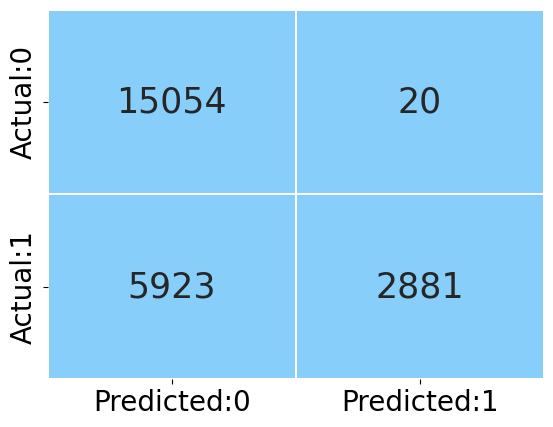

In [62]:
plot_confusion_matrix(dt_model)

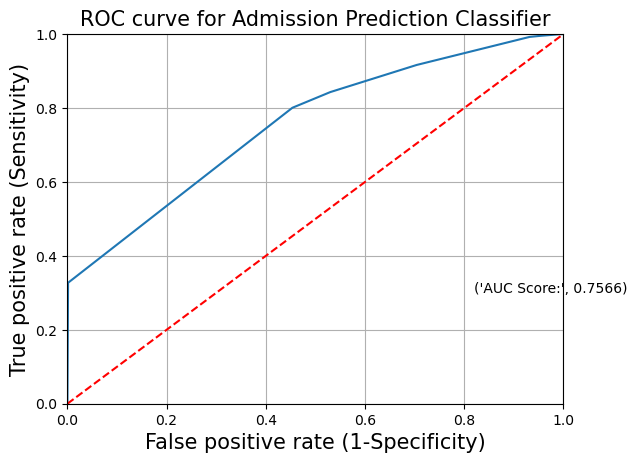

In [63]:
plot_roc(dt_model)

**Identify the important features.**

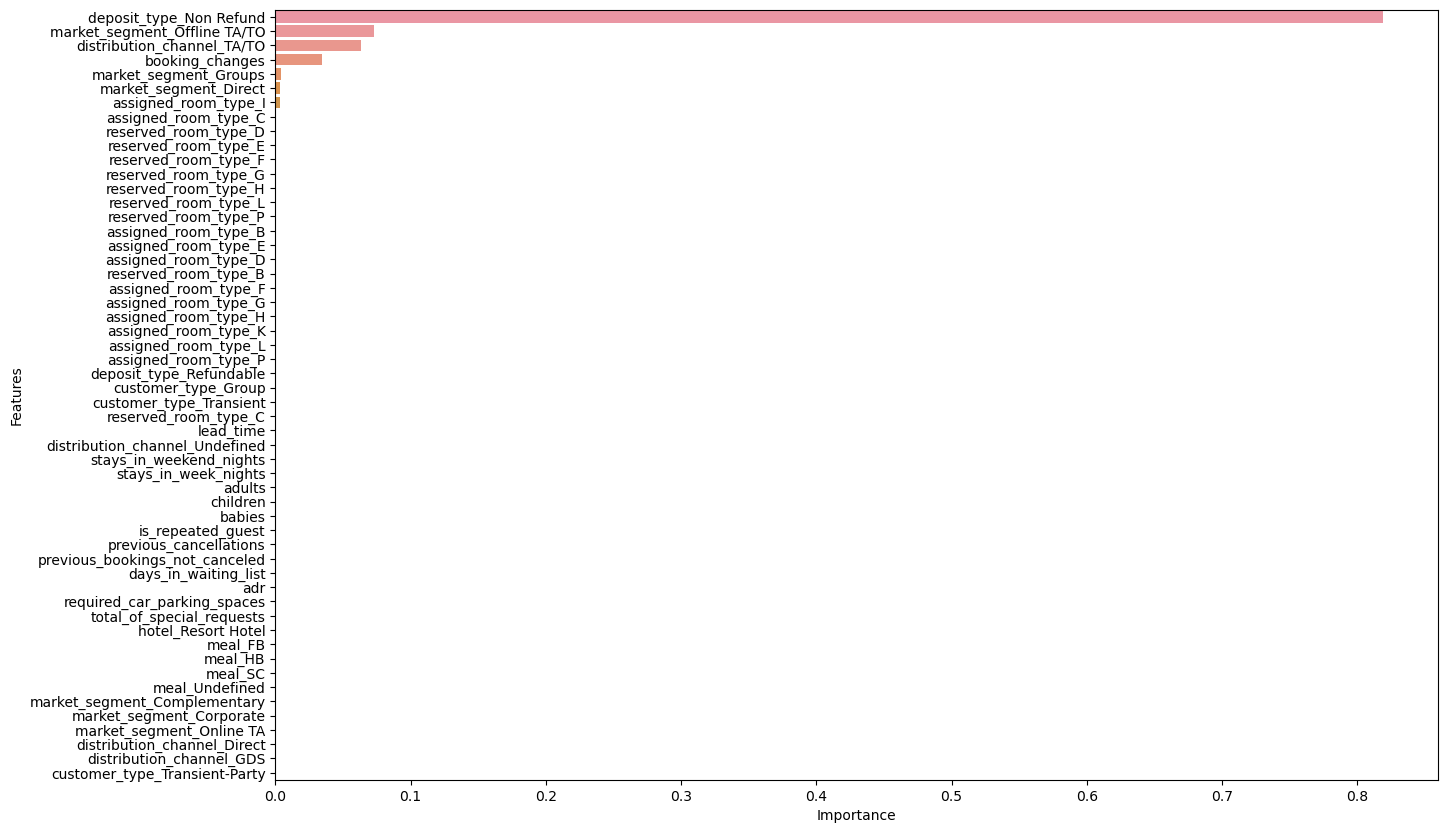

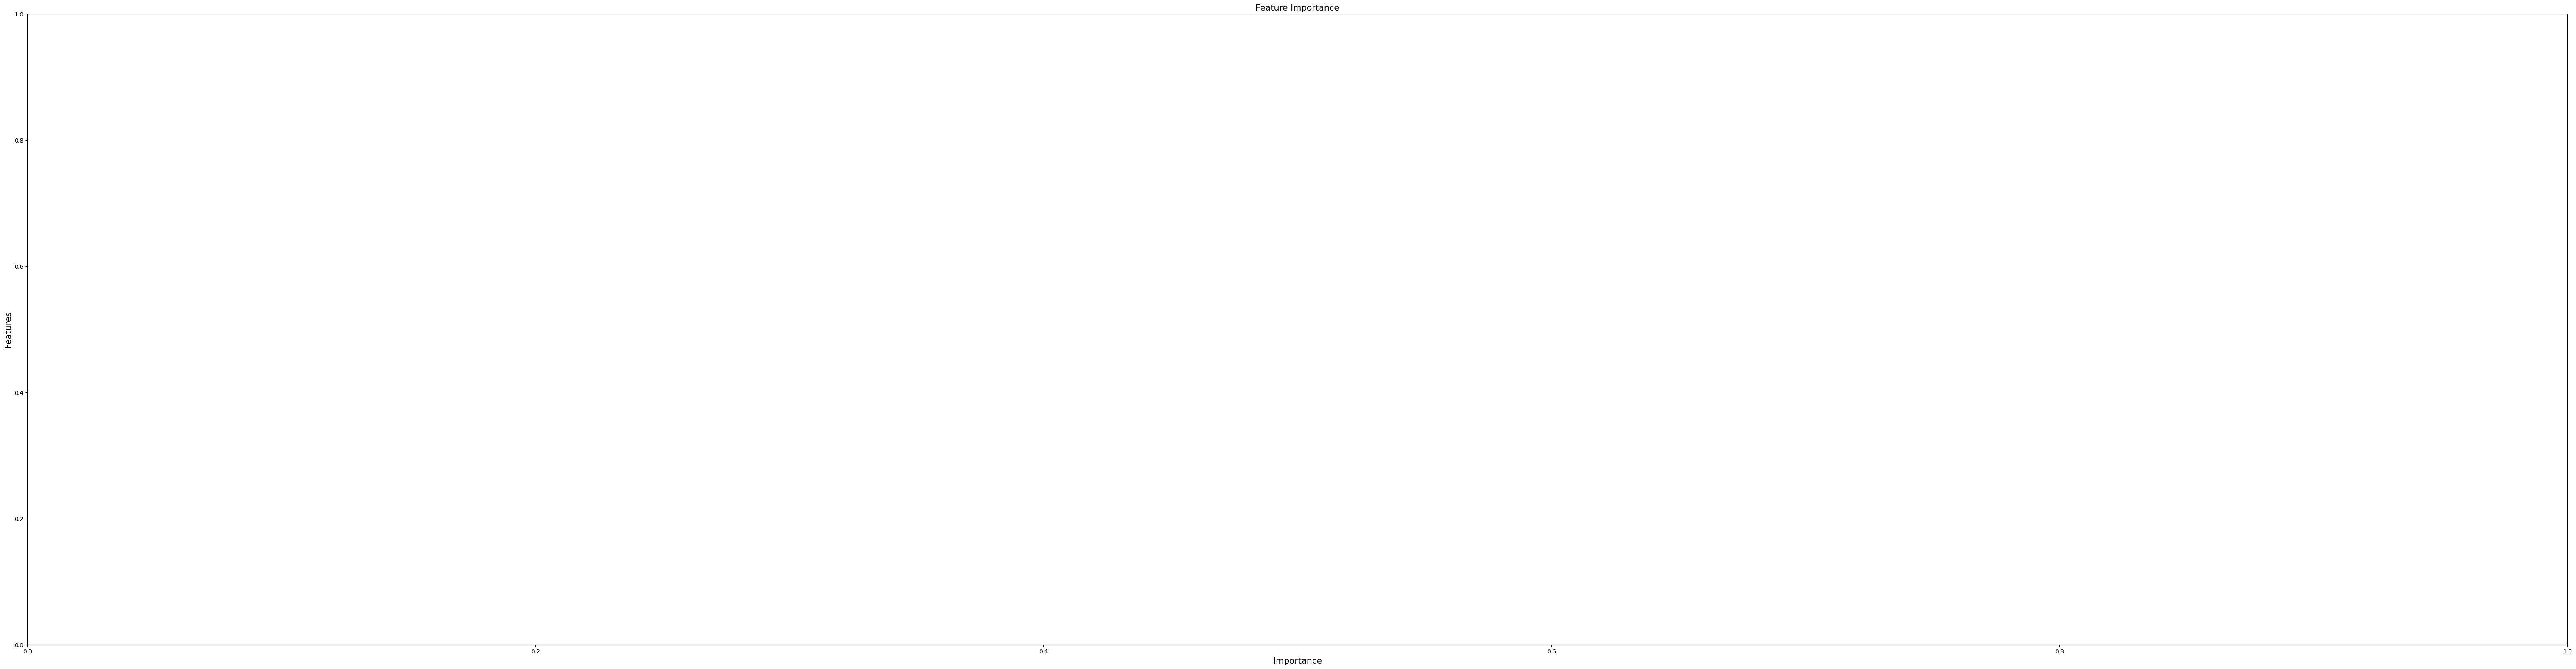

,Features,Importance
49,deposit_type_Non Refund,0.818601
23,market_segment_Offline TA/TO,0.073046
27,distribution_channel_TA/TO,0.063308
9,booking_changes,0.034535
22,market_segment_Groups,0.004066
21,market_segment_Direct,0.003263
45,assigned_room_type_I,0.003180
39,assigned_room_type_C,0.000000
31,reserved_room_type_D,0.000000
32,reserved_room_type_E,0.000000


In [64]:
important_features = pd.DataFrame({'Features': x_train.columns,
                                   'Importance': dt_model.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

plt.figure(figsize=(15, 10))
sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.figure(figsize=(80,20))
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()
important_features

# Random Forest for Classification

In [65]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)

rf_model = rf_classification.fit(x_train, y_train)

**Calculate performance measures on the train set.**

In [66]:
train_report = get_train_report(rf_model)

print(train_report) 

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     60092
           1       0.99      0.96      0.97     35416

    accuracy                           0.98     95508
   macro avg       0.98      0.97      0.98     95508
weighted avg       0.98      0.98      0.98     95508



**Calculate performance measures on the test set.**

In [67]:
test_report = get_test_report(rf_model)

print(test_report) 

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     15074
           1       0.84      0.74      0.79      8804

    accuracy                           0.85     23878
   macro avg       0.85      0.83      0.84     23878
weighted avg       0.85      0.85      0.85     23878



## Tune the Hyperparameters using GridSearchCV (Random Forest)

#### Build the model using the tuned hyperparameters.

In [68]:
rf_model = RandomForestClassifier(criterion = 'gini', 
                                  n_estimators = 90,
                                  max_depth = 15,
                                  max_features = 'sqrt',
                                  max_leaf_nodes = 14,
                                  min_samples_leaf = 5,
                                  min_samples_split = 2,
                                  random_state = 10)

rf_model = rf_model.fit(x_train, y_train)

print('Classification Report for train set:\n', get_train_report(rf_model))
print('Classification Report for test set:\n', get_test_report(rf_model))

Classification Report for train set:
               precision    recall  f1-score   support

           0       0.76      0.98      0.86     60092
           1       0.93      0.49      0.64     35416

    accuracy                           0.80     95508
   macro avg       0.85      0.73      0.75     95508
weighted avg       0.82      0.80      0.78     95508

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.77      0.98      0.86     15074
           1       0.93      0.49      0.64      8804

    accuracy                           0.80     23878
   macro avg       0.85      0.73      0.75     23878
weighted avg       0.83      0.80      0.78     23878



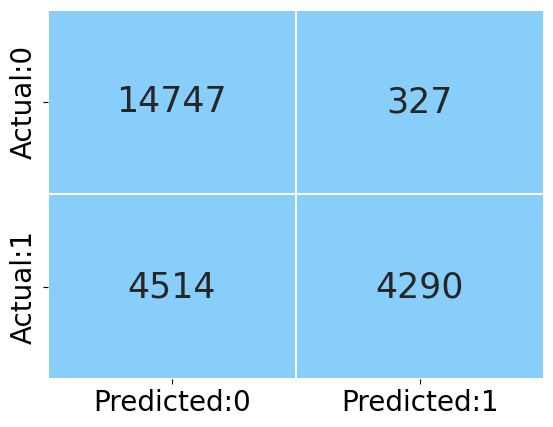

In [69]:
plot_confusion_matrix(rf_model)

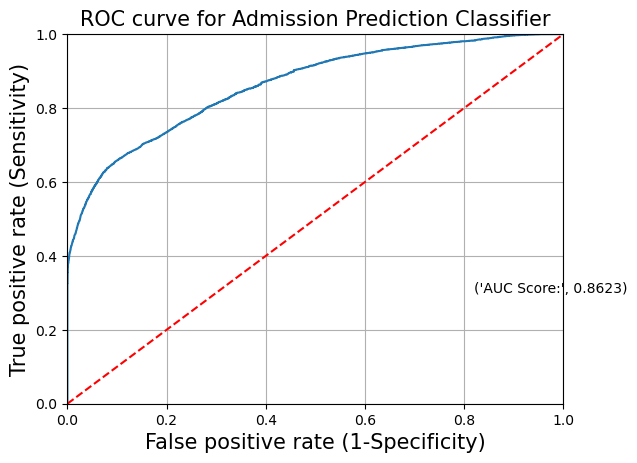

In [70]:
plot_roc(rf_model)

### Identify the Important Features

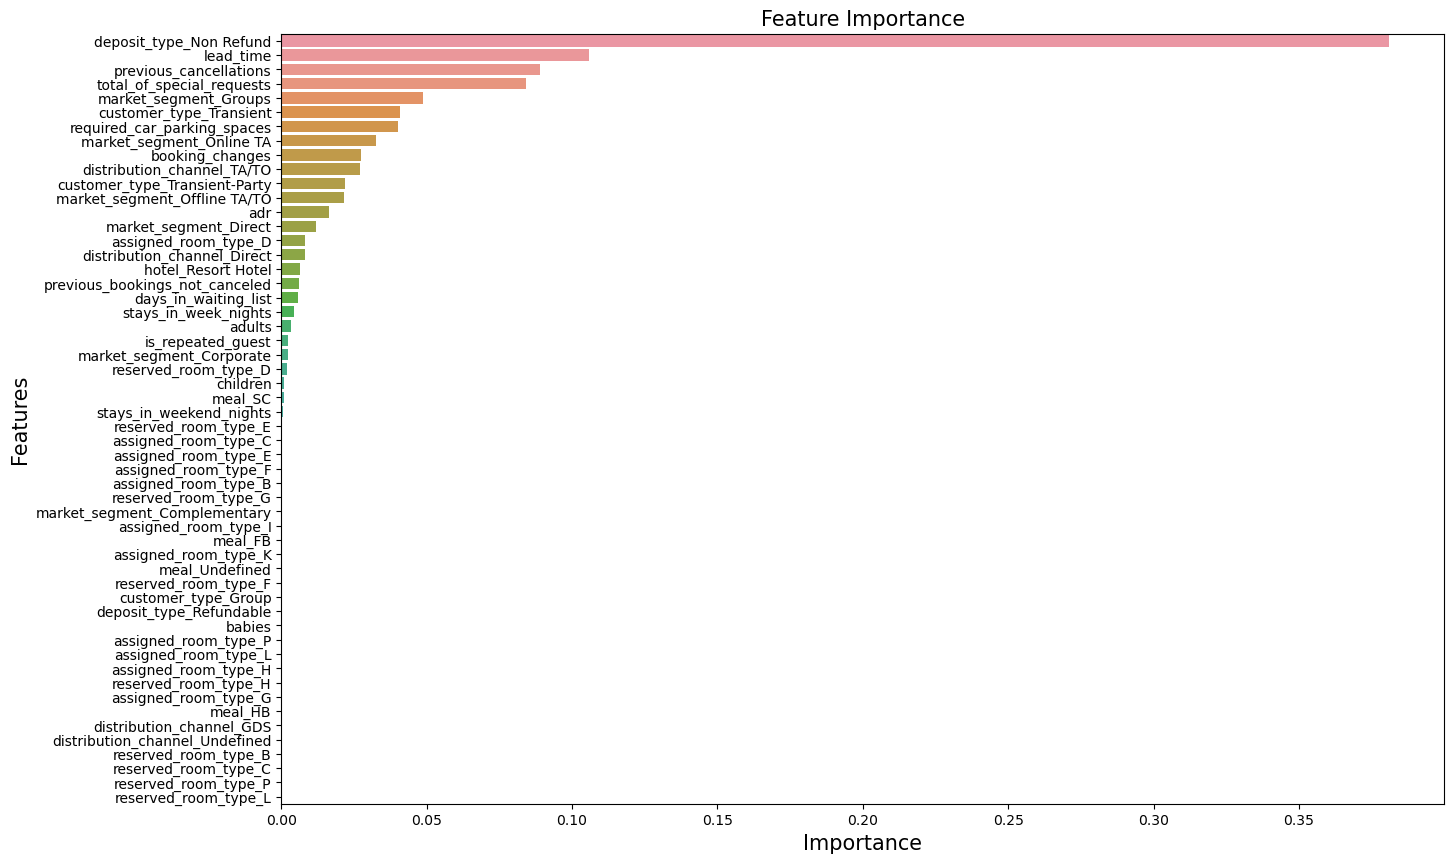

,Features,Importance
49,deposit_type_Non Refund,0.380831
0,lead_time,0.105923
7,previous_cancellations,0.088952
13,total_of_special_requests,0.084066
22,market_segment_Groups,0.048610
52,customer_type_Transient,0.040910
12,required_car_parking_spaces,0.040273
24,market_segment_Online TA,0.032426
9,booking_changes,0.027309
27,distribution_channel_TA/TO,0.027059


In [71]:
important_features = pd.DataFrame({'Features': x_train.columns, 
                                   'Importance': rf_model.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

plt.figure(figsize=(15, 10))
sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()
important_features

# XGBoost for Classification

In [72]:
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)

xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

**Calculate performance measures on the train set.**

In [73]:
train_report = get_train_report(xgb_model)

print(train_report) 

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     60092
           1       0.87      0.74      0.80     35416

    accuracy                           0.86     95508
   macro avg       0.87      0.84      0.85     95508
weighted avg       0.86      0.86      0.86     95508



**Calculate performance measures on the test set.**

In [74]:
test_report = get_test_report(xgb_model)

print(test_report) 

              precision    recall  f1-score   support

           0       0.84      0.92      0.88     15074
           1       0.84      0.71      0.77      8804

    accuracy                           0.84     23878
   macro avg       0.84      0.82      0.83     23878
weighted avg       0.84      0.84      0.84     23878



## Tune the Hyperparameters using GridSearchCV (XGBClassifier)

In [75]:
xgb_grid_model = XGBClassifier(learning_rate = 0.3,
                               max_depth = 9,
                              gamma = 0)

xgb_model = xgb_grid_model.fit(x_train, y_train)

print('Classification Report for train set:\n', get_train_report(xgb_model))
print('Classification Report for test set:\n', get_test_report(xgb_model))

Classification Report for train set:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91     60092
           1       0.89      0.78      0.84     35416

    accuracy                           0.89     95508
   macro avg       0.89      0.86      0.87     95508
weighted avg       0.89      0.89      0.88     95508

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.85      0.92      0.89     15074
           1       0.84      0.73      0.78      8804

    accuracy                           0.85     23878
   macro avg       0.85      0.83      0.83     23878
weighted avg       0.85      0.85      0.85     23878



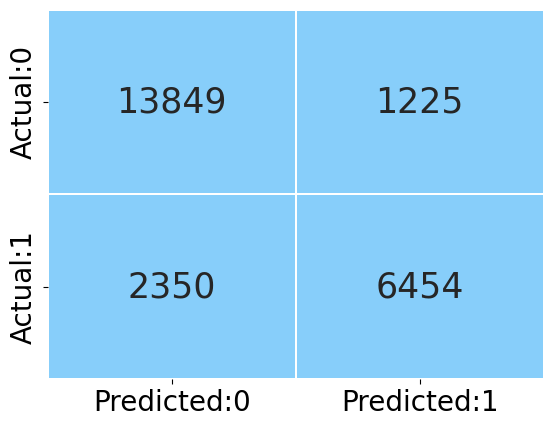

In [76]:
plot_confusion_matrix(xgb_model)

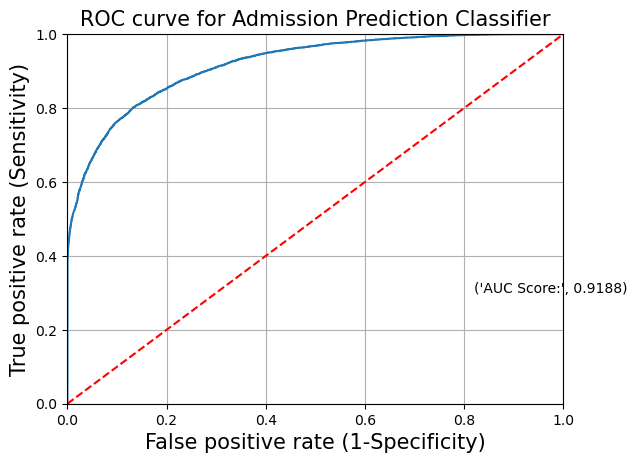

In [77]:
plot_roc(xgb_model)

### Identify the Important Features

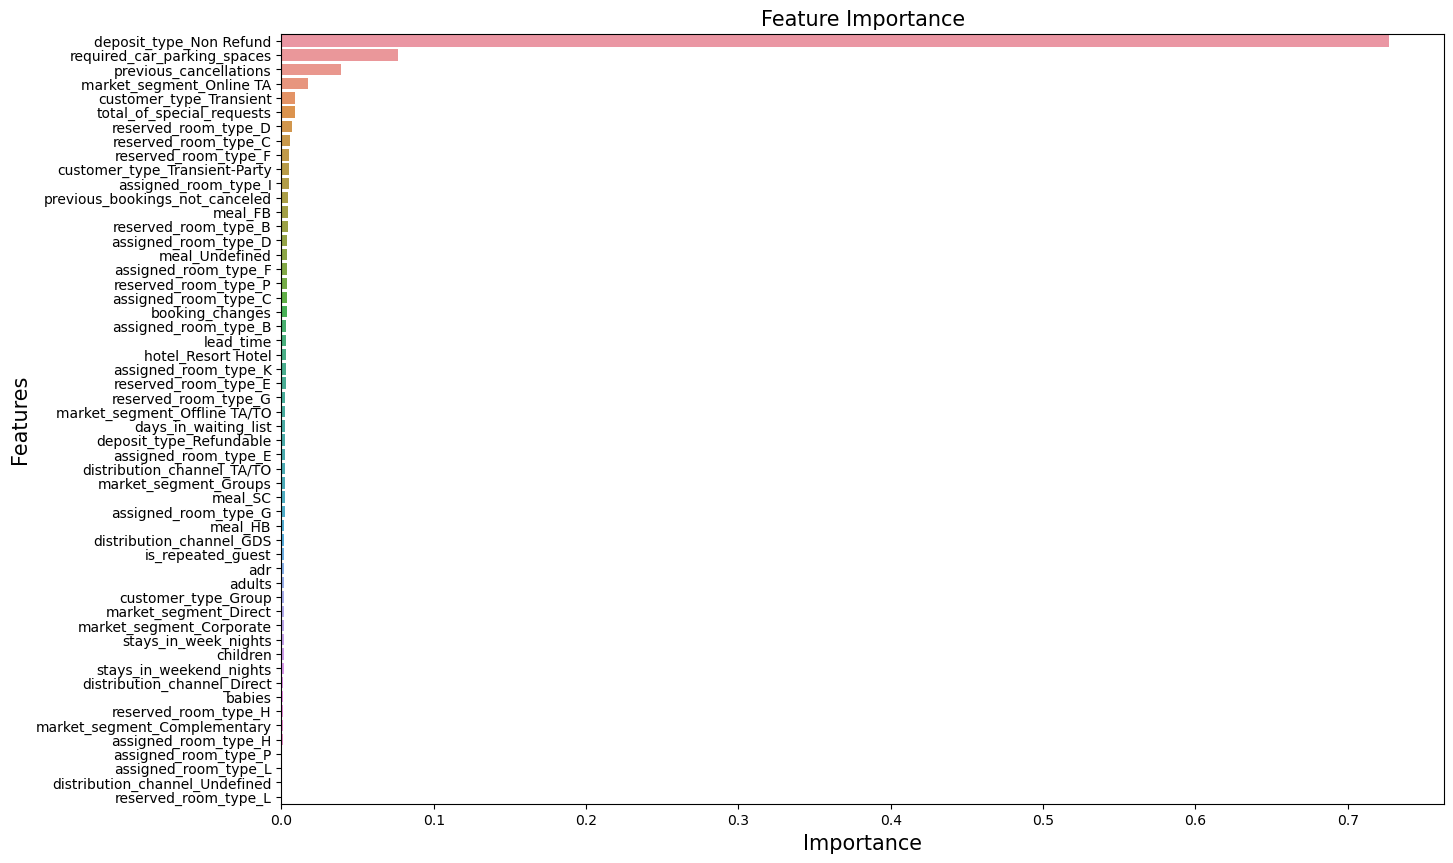

,Features,Importance
49,deposit_type_Non Refund,0.726731
12,required_car_parking_spaces,0.076553
7,previous_cancellations,0.039060
24,market_segment_Online TA,0.017238
52,customer_type_Transient,0.008926
13,total_of_special_requests,0.008838
31,reserved_room_type_D,0.007017
30,reserved_room_type_C,0.005665
33,reserved_room_type_F,0.004969
53,customer_type_Transient-Party,0.004942


In [78]:
important_features = pd.DataFrame({'Features': x_train.columns, 
                                   'Importance': xgb_model.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

plt.figure(figsize=(15, 10))
sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()
important_features

In [80]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import classification_report, make_scorer


In [81]:
xgb_model = XGBClassifier(max_depth = 10, gamma = 1,enable_categorical=True)

# Define scoring metrics for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_weighted',
    'recall': 'recall_weighted',
    'f1': 'f1_weighted'
}

# Perform cross-validation
cv_results = cross_validate(xgb_model, x_train, y_train, cv=5, scoring=scoring)

# Print cross-validation results
print("Cross-validation accuracy: ", np.mean(cv_results['test_accuracy']))
print("Cross-validation precision: ", np.mean(cv_results['test_precision']))
print("Cross-validation recall: ", np.mean(cv_results['test_recall']))
print("Cross-validation F1-score: ", np.mean(cv_results['test_f1']))

Cross-validation accuracy:  0.8441701679258724
Cross-validation precision:  0.8446941381384058
Cross-validation recall:  0.8441701679258724
Cross-validation F1-score:  0.840616404932582
